Task Description:  
  
Investigate three healthcare testing companies - Advance Genomic Diagnostics, Exelonixx Labs Inc., and California Molecular Testing Inc. 
These companies all went out of business in or before 2022 under suspicious circumstances. Analyze the data available for 
these companies and determine if there is evidence of potential fraud or other wrongdoing.  
  
Note: The data provided for the three companies is broken down by date, total number of patients that day, cost per testing, and the summary of what was billed to the insurance company and/or Medicaid with insurance.  
  
The data was compiled from individual records, but the originals are unavailable. Some of the data may contain missing values, duplicates, 
or things like NA or N/A, so data cleaning is necessary.  
  
Link:  
https://www.kaggle.com/datasets/darrenchess/detecting-healthcare-fraud-using-benfords-law/data  


Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


Import Data

In [2]:
# Advance Genomic Diagnostics
df_agd = pd.read_csv("Algorithm-Benfords_Law_Work/unclean_AGL.csv")
df_agd = df_agd.sort_values(by='date')

# Exelonixx Labs Inc.
df_excel = pd.read_csv("Algorithm-Benfords_Law_Work/Unclean_Excellonix.csv") 
df_excel = df_excel.sort_values(by='date')

# California Molecular Testing Inc. 
df_cmt = pd.read_csv("Algorithm-Benfords_Law_Work/unclean_california_molecular.csv") 
df_cmt = df_cmt.sort_values(by='date')



Clean Data - Duplicate Dates

In [3]:
# Need to identify duplicate values, missing values, or things like NA or N/A.
# Actions taken: 
# Keep duplicate dates but note this in written report. Testing Benfords Law requires 
# analyzing the distribution of first digits of some numerical column 
# (like transaction amount), not time series behavior. Dates are metadata.

# Advance Genomic Diagnostics
duplicates_agd = df_agd[df_agd.duplicated(subset='date', keep=False)]
print("Duplicate Dates for Advance Genomic Diagnostics:\n",duplicates_agd['date'])
print('')

# Exelonixx Labs Inc.
duplicates_excel = df_excel[df_excel.duplicated(subset='date', keep=False)]
print("Duplicate Dates for Exelonixx Labs Inc.:\n",duplicates_excel['date'])
print('')

# California Molecular Testing Inc. 
duplicates_cmt = df_cmt[df_cmt.duplicated(subset='date', keep=False)]
print("Duplicate Dates for California Molecular Testing Inc.:\n",duplicates_agd['date'])
print('')


Duplicate Dates for Advance Genomic Diagnostics:
 13    4/11/2020
12    4/11/2020
6      4/6/2020
5      4/6/2020
9      4/9/2020
10     4/9/2020
43    5/12/2020
44    5/12/2020
52    5/18/2020
50    5/18/2020
51    5/19/2020
53    5/19/2020
79    6/14/2020
80    6/14/2020
83    6/16/2020
82    6/16/2020
Name: date, dtype: object

Duplicate Dates for Exelonixx Labs Inc.:
 242    12/3/2020
241    12/3/2020
365     4/5/2021
364     4/5/2021
Name: date, dtype: object

Duplicate Dates for California Molecular Testing Inc.:
 13    4/11/2020
12    4/11/2020
6      4/6/2020
5      4/6/2020
9      4/9/2020
10     4/9/2020
43    5/12/2020
44    5/12/2020
52    5/18/2020
50    5/18/2020
51    5/19/2020
53    5/19/2020
79    6/14/2020
80    6/14/2020
83    6/16/2020
82    6/16/2020
Name: date, dtype: object



Clean Data - Missing Values (Blank, NA, N/A)

In [5]:
# Need to identify duplicate values, missing values, or things like NA or N/A.
# Actions taken: 
# Remove them but note this in the written report. Testing Benfords Law requires 
# analyzing the distribution of first digits of some numerical column. Performing 
# imputation on missing data may skew results of the test.

# Advance Genomic Diagnostics
print('Advance Genomic Diagnostics Missing Values:')
df_agd.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
df_agd.dropna(inplace=True)
print(df_agd.isnull().sum())


# Exelonixx Labs Inc.
print('Exelonixx Labs Inc. Missing Values:')
df_excel.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
df_excel.dropna(inplace=True)
print(df_excel.isnull().sum())


# California Molecular Testing Inc. 
print('California Molecular Testing Inc. Missing Values:')
df_cmt.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
df_cmt.dropna(inplace=True)
print(df_cmt.isnull().sum())



Advance Genomic Diagnostics Missing Values:
date                             0
patients sumnarized              0
cost per testing summarized      0
Total Insurance Claims Billed    0
dtype: int64
Exelonixx Labs Inc. Missing Values:
date                             0
case study fraud numbers         0
cost per testing summarized      0
Total Insurance Claims Billed    0
dtype: int64
California Molecular Testing Inc. Missing Values:
date                             0
cases                            0
Cost Per Testing Summarized      0
Total Insurance Claims Billed    0
dtype: int64


Obtain First Number per Numeric-Based Column

In [7]:
# Obtain first number per numeric-based column 

# Advance Genomic Diagnostics
df_agd['first digit - patients sumnarized'] = df_agd['patients sumnarized'].astype(str).str[0].astype(int)
df_agd['first digit - cost per testing summarized'] = df_agd['cost per testing summarized '].astype(str).str[0].astype(int)
df_agd['first digit - Total Insurance Claims Billed'] = df_agd['Total Insurance Claims Billed'].astype(str).str[0].astype(int)

# Exelonixx Labs Inc.
df_excel['first digit - case study fraud numbers'] = df_excel['case study fraud numbers'].astype(str).str[0].astype(int)
df_excel['first digit - cost per testing summarized'] = df_excel['cost per testing summarized '].astype(str).str[0].astype(int)
df_excel['first digit - Total Insurance Claims Billed'] = df_excel['Total Insurance Claims Billed'].astype(str).str[0].astype(int)

# California Molecular Testing Inc. 
df_cmt['first digit - cases'] = df_cmt['cases'].astype(str).str[0].astype(int)
df_cmt['first digit - Cost Per Testing Summarized'] = df_cmt['Cost Per Testing Summarized'].astype(str).str[0].astype(int)
df_cmt['first digit - Total Insurance Claims Billed'] = df_cmt['Total Insurance Claims Billed'].astype(str).str[0].astype(int)


Create Histogram Plots for Count of Patients Summarized (Benfords Law Testing)

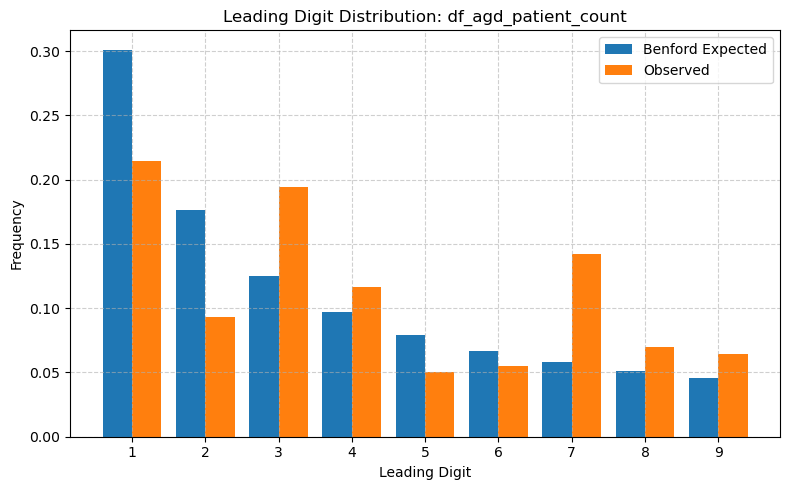

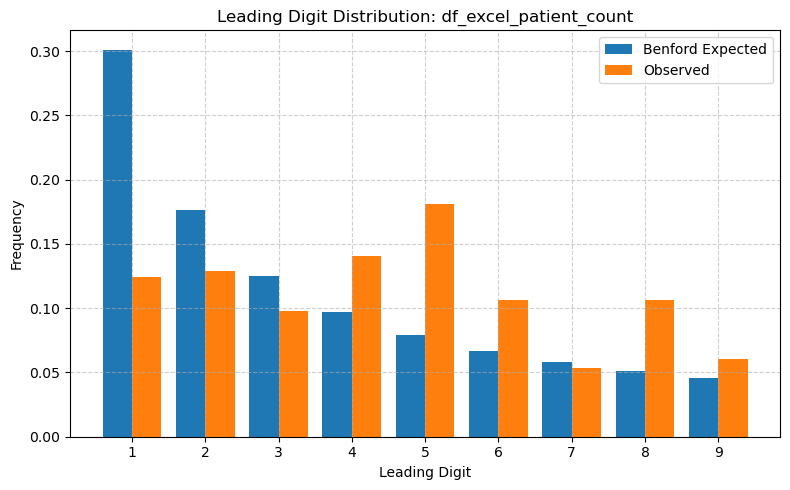

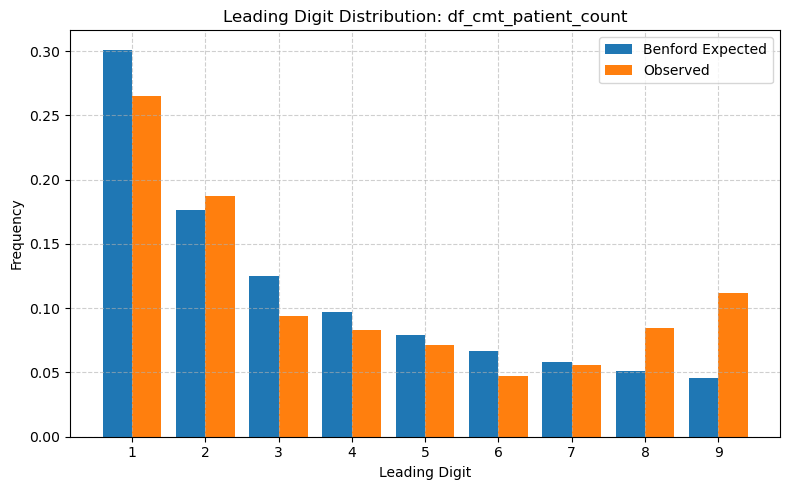

In [36]:
# Count frequency of digits 1–9
df_agd_patient_count = df_agd['first digit - patients sumnarized'].value_counts().sort_index()
df_excel_patient_count = df_excel['first digit - case study fraud numbers'].value_counts().sort_index()
df_cmt_patient_count = df_cmt['first digit - cases'].value_counts().sort_index()

# Calculate Benford distribtuion and arrange numbers for histogram plots.
benford_dist = np.log10(1 + 1 / np.arange(1, 10))
digits = np.arange(1, 10)

# Calculate histogram plot for Advance Genomic Diagnostics
observed_freq = df_agd_patient_count.reindex(digits, fill_value=0) / df_agd_patient_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_agd_patient_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate histogram plot for Exelonixx Labs Inc.
observed_freq = df_excel_patient_count.reindex(digits, fill_value=0) / df_excel_patient_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_excel_patient_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate histogram plot for California Molecular Testing Inc.
observed_freq = df_cmt_patient_count.reindex(digits, fill_value=0) / df_cmt_patient_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_cmt_patient_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Create Histogram Plots for Cost per Testing (Benfords Law Testing)

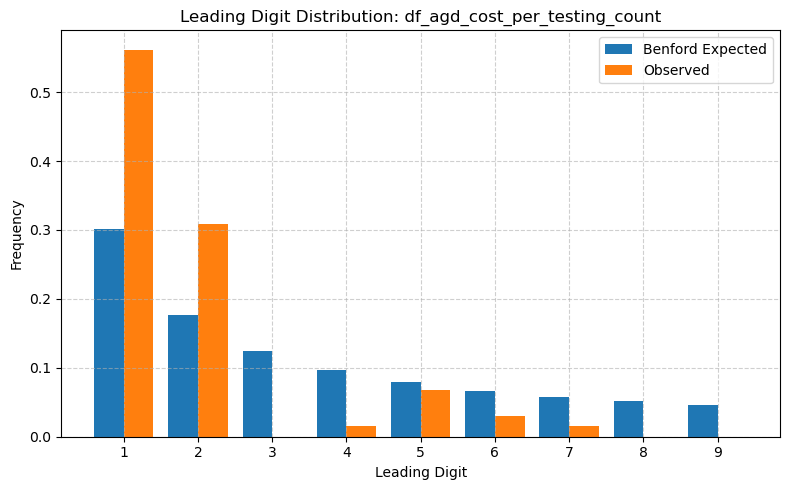

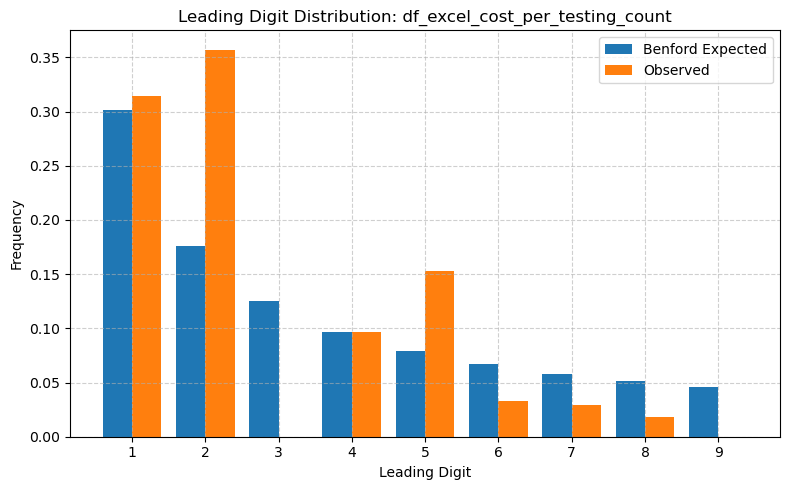

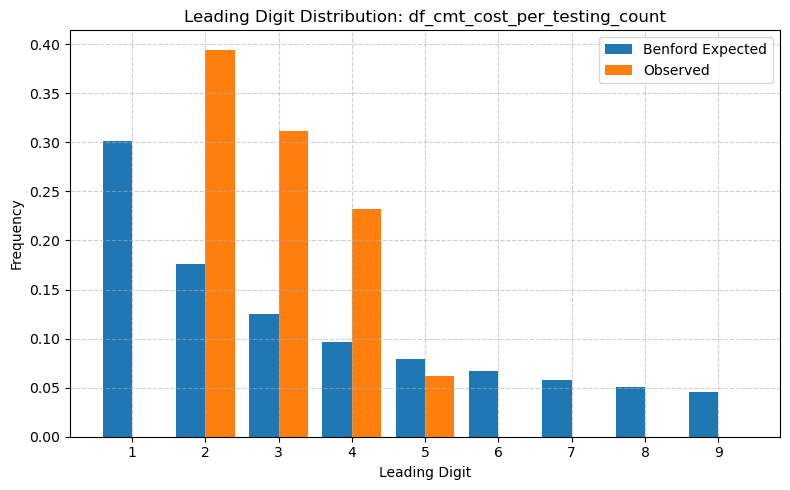

In [37]:
# Count frequency of digits 1–9
df_agd_cost_per_testing_count = df_agd['first digit - cost per testing summarized'].value_counts().sort_index()
df_excel_cost_per_testing_count = df_excel['first digit - cost per testing summarized'].value_counts().sort_index()
df_cmt_cost_per_testing_count = df_cmt['first digit - Cost Per Testing Summarized'].value_counts().sort_index()

# Calculate Benford distribtuion and arrange numbers for histogram plots.
benford_dist = np.log10(1 + 1 / np.arange(1, 10))
digits = np.arange(1, 10)

# Calculate histogram plot for Advance Genomic Diagnostics
observed_freq = df_agd_cost_per_testing_count.reindex(digits, fill_value=0) / df_agd_cost_per_testing_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_agd_cost_per_testing_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate histogram plot for Exelonixx Labs Inc.
observed_freq = df_excel_cost_per_testing_count.reindex(digits, fill_value=0) / df_excel_cost_per_testing_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_excel_cost_per_testing_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate histogram plot for California Molecular Testing Inc.
observed_freq = df_cmt_cost_per_testing_count.reindex(digits, fill_value=0) / df_cmt_cost_per_testing_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_cmt_cost_per_testing_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Create Histogram Plots for Insurance Claims Billed (Benfords Law Testing)

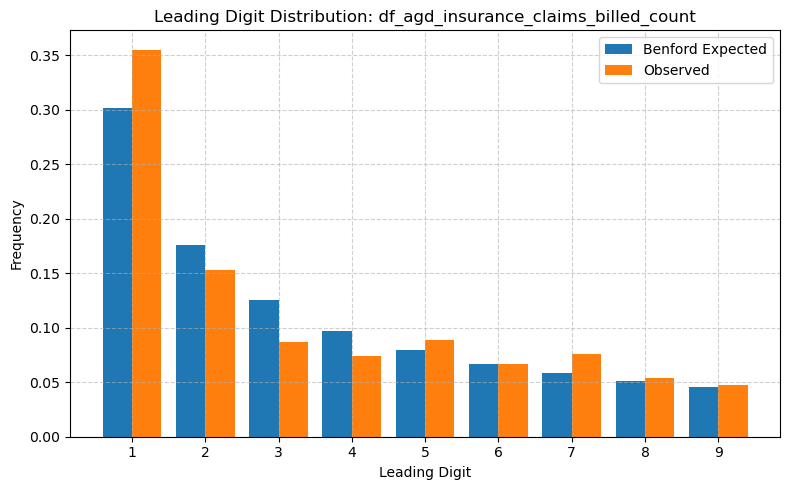

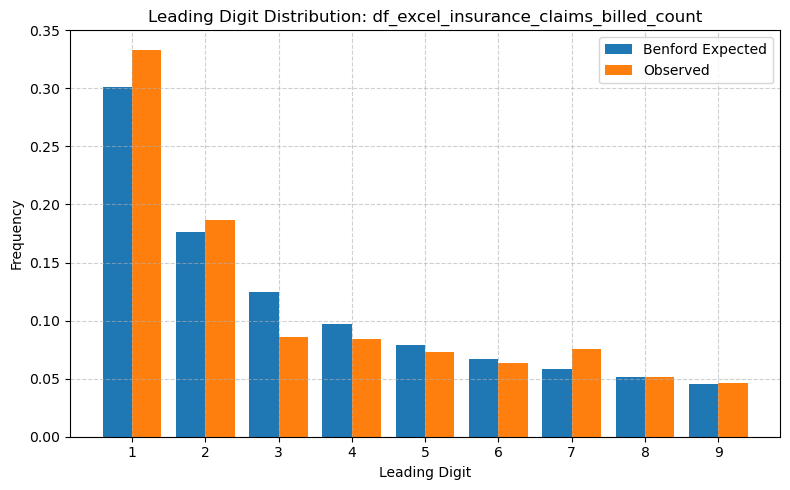

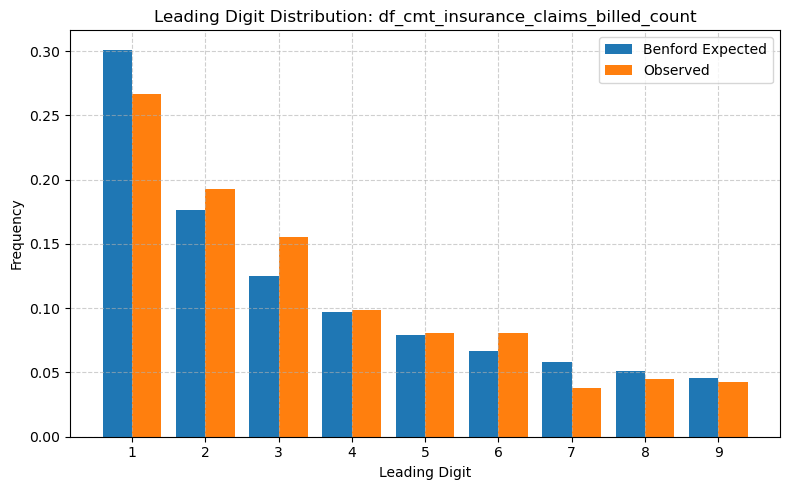

In [38]:
# Count frequency of digits 1–9

df_agd_insurance_claims_billed_count = df_agd['first digit - Total Insurance Claims Billed'].value_counts().sort_index()
df_excel_insurance_claims_billed_count = df_excel['first digit - Total Insurance Claims Billed'].value_counts().sort_index()
df_cmt_insurance_claims_billed_count = df_cmt['first digit - Total Insurance Claims Billed'].value_counts().sort_index()

# Calculate Benford distribtuion and arrange numbers for histogram plots.
benford_dist = np.log10(1 + 1 / np.arange(1, 10))
digits = np.arange(1, 10)

# Calculate histogram plot for Advance Genomic Diagnostics
observed_freq = df_agd_insurance_claims_billed_count.reindex(digits, fill_value=0) / df_agd_insurance_claims_billed_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_agd_insurance_claims_billed_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate histogram plot for Exelonixx Labs Inc.
observed_freq = df_excel_insurance_claims_billed_count.reindex(digits, fill_value=0) / df_excel_insurance_claims_billed_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_excel_insurance_claims_billed_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate histogram plot for California Molecular Testing Inc.
observed_freq = df_cmt_insurance_claims_billed_count.reindex(digits, fill_value=0) / df_cmt_insurance_claims_billed_count.sum()
plt.figure(figsize=(8, 5))
plt.bar(digits - 0.2, benford_dist, width=0.4, label='Benford Expected', align='center')
plt.bar(digits + 0.2, observed_freq, width=0.4, label='Observed', align='center')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f"Leading Digit Distribution: df_cmt_insurance_claims_billed_count")
plt.xticks(digits)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Summary

Refer to the document "Report" to view an in-depth analysis of the work performed within this notebook. 